In [1]:
import math 
import random
import numpy as np
import copy
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [3]:
def bin_space_gen(d):
    all_coeff = {}
    for i in range(0,2**(d)): 
        t = i
        all_coeff[i] = ""
        for j in range (0,d):
            all_coeff[i]= str(t%2)+all_coeff[i]
            t = int(t/2)
    return all_coeff

In [4]:
def choose(n, k):
    """
    A fast way to calculate binomial coefficients by Andrew Dalke (contrib).
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

In [5]:
def BSC(x,p):
  y = ""
  for i in range(len(x)):
    if np.random.binomial(1, p):
      y += str((int(x[i])+1)%2)
    else:
      y += x[i]
  return y

def BEC(x,p):
  y = ""
  for i in range(len(x)):
    if np.random.binomial(1, p):
      y += "*"
    else:
      y += x[i]
  return y


def ers_chan(N,C,p):
  Y = {}
  IO = {}
  for i in range(len(C)): 
    for j in range(N):
      y = BEC(C[i],p) 
      Y[N*i+j] = y
      IO[N*i+j] = (C[i],Y[N*i+j])
  return Y,IO

In [7]:
def bin_dec(y):
  y_dec = 0
  for i in range(len(y)):
    if(y[i]=="1"):
      y_dec += 2**(len(y)-i-1)
  return y_dec
  
def dec_bin(y):
  y_bin = ""
  while(y>0):
    y_bin = str(y%2) + y_bin
    y = int(y/2)
  return y_bin

def pos_inps(y):
  inps = []
  ers = []
  for i in range(len(y)):
    if(y[i]=="*"):
      ers.append(i)
  ers_rep = bin_space_gen(len(ers))
  for i in range(len(ers_rep)):
    inp = list(y)
    for j in range(len(ers)):
      inp[ers[j]] = ers_rep[i][j]
    inp_str = ""
    for j in range(len(inp)):
      inp_str += inp[j]
    inps.append(inp_str)
  
  return inps

def buil_graph_out(IO):
  graph_out = {} 
  for i in range(len(IO)):
    y = IO[i][1]
    edges = pos_inps(y)
    graph_out[i] = (y, edges)
  return graph_out

In [8]:
def build_graph_in(graph_out,C):
  graph_in = {}
  for i in range(len(C)):
    graph_in[i] = (C[i],[])

  for i in range(len(graph_out)):
    for j in range(len(graph_out[i][1])):
      graph_in[bin_dec(graph_out[i][1][j])][1].append(graph_out[i][0])
  
  return graph_in

In [7]:
def peel_out(i,graph_out, graph_in):
  out_node = graph_out[i][0]
  in_node = graph_out[i][1][0]
  
  for j in range(len(graph_out)):
    if((len(graph_out[j][1]) > 1) and (in_node in graph_out[j][1])):
        graph_out[j][1].remove(in_node)

  graph_in[bin_dec(in_node)][1].clear()
  graph_in[bin_dec(in_node)][1].append(out_node)


def peel_in(i,graph_out, graph_in):
  in_node = graph_in[i][0]
  out_node = graph_in[i][1][0]
  
  for j in range(len(graph_in)):
    if((len(graph_in[j][1]) > 1) and (out_node in graph_in[j][1])):
        graph_in[j][1].remove(out_node)

  for j in range(len(graph_out)):
    if(out_node == graph_out[j][0]):
        graph_out[j][1].clear()
        graph_out[j][1].append(in_node)

def peel_dec(N,C, CNT,graph_out, graph_in):
  for _ in range(CNT):
    for i in range(len(graph_out)):
      if (len(graph_out[i][1])==1):
        peel_out(i,graph_out,graph_in)
   
    for i in range(len(graph_in)):
      if (len(graph_in[i][1])==1):
        peel_in(i,graph_out,graph_in)

  return graph_out,graph_in

In [8]:
n = 2
p = 0.2
C = bin_space_gen(n)
N = 2
Y,IO = ers_chan(N,C,p)

graph_out_org = buil_graph_out(IO)
graph_in_org = build_graph_in(graph_out_org,C)
graph_in_org

{0: ('00', ['00', '00', '**', '**']),
 1: ('01', ['01', '**', '**']),
 2: ('10', ['**', '10', '**', '1*']),
 3: ('11', ['**', '**', '1*', '11'])}

In [14]:
def degN(graph_in_org,N):
  dN = 0 
  for i in range(len(graph_in_org)):
    if(len(graph_in_org[i][1])==N):
      dN+=1
  return dN/len(graph_in_org)

In [15]:
degN(graph_in_org)

0.5

In [17]:
n = 4
p_dict = np.linspace(0.01,0.5,25)
C = bin_space_gen(n)
TEST = 100

N = 2 
deg2_p = []
for p in p_dict: 
  dN = 0 
  for i in range(TEST):
    Y,IO = ers_chan(N,C,p)
    graph_out_org = buil_graph_out(IO)
    graph_in_org = build_graph_in(graph_out_org,C)
    dN += degN(graph_in_org,N)
  deg2_p.append((2**n)*dN/TEST) 

N = 4
deg4_p = []
for p in p_dict: 
  dN = 0 
  for i in range(TEST):
    Y,IO = ers_chan(N,C,p)
    graph_out_org = buil_graph_out(IO)
    graph_in_org = build_graph_in(graph_out_org,C)
    dN += degN(graph_in_org,N)
  deg4_p.append((2**n)*dN/TEST) 

N = 6
deg6_p = []
for p in p_dict: 
  dN = 0 
  for i in range(TEST):
    Y,IO = ers_chan(N,C,p)
    graph_out_org = buil_graph_out(IO)
    graph_in_org = build_graph_in(graph_out_org,C)
    dN += degN(graph_in_org,N)
  deg6_p.append((2**n)*dN/TEST) 

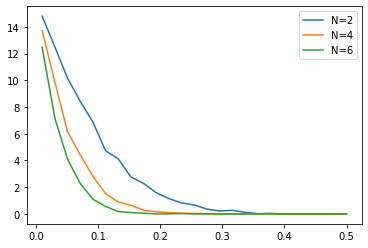

In [18]:
plt.plot(p_dict, deg2_p, label="N=2")
plt.plot(p_dict, deg4_p, label="N=4")
plt.plot(p_dict, deg6_p, label="N=6")
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

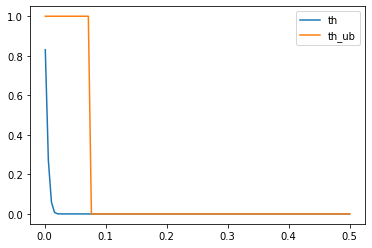

<Figure size 1440x1440 with 0 Axes>

In [12]:
N = 3
n = 60
p_dict = np.linspace(0.001,0.5,100)
# C = bin_space_gen(n)
TEST = 25

degN_p = []
degN_p_th = []
degN_p_th_ub = []
p_th = 1


for i in range(len(p_dict)): 
  p = p_dict[i]
  # dN = 0 
  # for i in range(TEST):
  #   Y,IO = ers_chan(N,C,p)
  #   graph_out_org = buil_graph_out(IO)
  #   graph_in_org = build_graph_in(graph_out_org,C)
  #   dN += degN(graph_in_org)
  # degN_p.append((dN/TEST))

  dN_th = 1 
  for r in range(1,n+1):
    dN_th *= (1-p**r)**(choose(n,r)*N)
  degN_p_th.append(dN_th) 
  if((2**n)*dN_th>=1):
    p_th = p 
    

  dN_th_ub = 2**(N*(2**n)*math.log((2**n-(1+p)**n)/(2**n-1),2))
  degN_p_th_ub.append(dN_th_ub) 


# plt.plot(p_dict, degN_p, label="sim")
plt.plot(p_dict, degN_p_th, label="th")
plt.plot(p_dict, degN_p_th_ub, label="th_ub")
plt.legend(loc="upper right")
plt.figure(figsize=(20, 20))
plt.show()

In [43]:
p_th

0.07660606060606061

In [23]:
d = {'prob': p_dict, 'degN_p_th': degN_p_th, 'degN_p_th_ub': degN_p_th_ub}
df = pd.DataFrame(data=d)

In [24]:
fig = px.line(df, x = "prob", y=df.columns[1:3])
fig.show()

In [48]:
p_th

0.07660606060606061

In [ ]:
# Peeling decoder needs to be updated for N copies

In [12]:
CNT = 5
graph_out_star, graph_in_star = peel_dec(N, C, CNT, copy.deepcopy(graph_out_org), copy.deepcopy(graph_in_org))
graph_in_star

{0: ('00', ['00']), 1: ('01', ['01']), 2: ('10', ['10']), 3: ('11', ['11'])}

In [ ]:
np.linspace(0.01,0.1,10)

In [13]:
n = 5
p_dict = np.linspace(0.01,0.1,10)
C = bin_space_gen(n)
TEST = 1000
P_err = []
for p in p_dict: 
  err = 0
  for i in range(TEST):
    Y,IO = ers_chan(C,p)
    graph_out_org = buil_graph_out(IO)
    graph_in_org = build_graph_in(graph_out_org)
    graph_out_star, graph_in_star, res = peel_dec(CNT, graph_out_org, graph_in_org)
    err+= res 
  P_err.append(err/TEST) 

TypeError: ers_chan() missing 1 required positional argument: 'p'

In [ ]:
P_err

In [ ]:
n = 6
p_dict = np.linspace(0.01,0.1,10)
C = bin_space_gen(n)
TEST = 1000
P_err = []


for p in p_dict: 
  err = 0
  for i in range(TEST):
    Y,IO = ers_chan(C,p)
    graph_out_org = buil_graph_out(IO)
    graph_in_org = build_graph_in(graph_out_org)
    graph_out_star, graph_in_star, res = peel_dec(CNT, graph_out_org, graph_in_org)
    err+= res 
  P_err.append(err/TEST) 

In [ ]:
P_err

In [ ]:
np.linspace(3,8,6)

In [ ]:
p = 0.02
n_dict = np.linspace(3,8,6)
TEST = 1000
P_err = []

for n in n_dict:
  n = int(n) 
  C = bin_space_gen(n)
  err = 0
  for i in range(TEST):
    Y,IO = ers_chan(C,p)
    graph_out_org = buil_graph_out(IO)
    graph_in_org = build_graph_in(graph_out_org)
    graph_out_star, graph_in_star, res = peel_dec(CNT, graph_out_org, graph_in_org)
    err+= res 
  P_err.append(err/TEST) 
  print(n, err/TEST)

In [ ]:
n = 4
p_dict = np.linspace(0.001,0.8,1600)
C = bin_space_gen(n)
TEST = 1500
P_err = []
for p in p_dict: 
  err = 0
  for i in range(TEST):
    Y,IO = ers_chan(C,p)
    graph_out_org = buil_graph_out(IO)
    graph_in_org = build_graph_in(graph_out_org)
    graph_out_star, graph_in_star, res = peel_dec(CNT, graph_out_org, graph_in_org)
    err+= res 
  P_err.append(err/TEST) 
  # print(p, err)

In [ ]:
# n = 3
plt.plot(p_dict, P_err)
plt.show()

In [ ]:
plt.plot(p_dict, P_err)&
plt.show()

In [ ]:
# # n = 4 
# plt.plot(p_dict, P_err)
# plt.show()

In [ ]:
#  PERMANENT OF A MATRIX - UPPER BOUND ON THE DECODING ERROR PROBABILITY OF PEELING DECODER

In [ ]:
from sympy import *
from sympy.abc import x,y,X,Y

In [ ]:
def ham_dist(a,b):
  cnt = 0
  for i in range(len(a)):
    if(a[i]!=b[i]):
      cnt+=1 
  return cnt 

In [ ]:
def n_fact(n):
  if(n>1):
    return n*n_fact(n-1)
  else:
    return 1

def rem_rc(U,r,c): 
  U_sub = np.delete(U, r, 0)
  U_sub = np.delete(U_sub, c, 1)
  return U_sub

In [ ]:
def perm(P,U):
  PERM = 0 
  if  len(U)>2:
    for j in range(len(U)):
      PERM += perm(P+U[0][j],rem_rc(U,0,j))
    return PERM 
  else:
    # print(P, p**(P+U[0][0]+U[1][1]) + p**(P+U[1][0]+U[0][1]))
    return p**(P+U[0][0]+U[1][1]) + p**(P+U[1][0]+U[0][1])
    

In [ ]:
n = 3
M = 2**n
C = bin_space_gen(n)
U = np.zeros((M,M))
for i in range(M):
  for j in range(M):
    U[i][j] = ham_dist(C[i],C[j])

In [ ]:
M

In [ ]:
Uf

In [ ]:
p = symbols('p')
PERM = perm(0,U)

In [ ]:
PERM

In [ ]:
temp = n_fact(8)
for i in range(1,9):
  print(temp/n_fact(i))

In [ ]:
for j in range(int(len(U)/2)):
  print(perm(U[0][j],rem_rc(U,0,j)))